<a href="https://colab.research.google.com/github/RishbahT/smoke-detection/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Use this dataset to predict which patients are most likely to suffer from a heart disease in the near future using the features given.

In [2]:
# Conclusion
# According the data,  45% of population is heaving Heart Disease.
# 24% are female 
# All the heart deseased people are above 35yrs
# 72% of population having high BP
# 75% of population heaving asymptomatic Chest Pain
# 49% of population heaving high Cholesterol
# 14% of population heaving high fasting blood sugar (> 120 mg/dl) 
# in genral heart rate is 60 to 100 beats per minute. here 95% of population have high heart rate.
# 65% high Thallium Toxicity.
# ST depression should be less than 0.5 mm, more than is as considered pathological. here 76% population is more than 0.5.
# 45% of population does not do exercise angina.

In [ ]:
# How will i predict----
# Cholesterol is more than 239 mg/dl. (200 mg/dL to 239 mg/dL)
# BP is more than 120/80 mmHg.         low bp---(90/60mmHg and 120/80mmHg)---high bp
# Age above 40.
# Heart Rate above 100 per min.   (60 to 100 beats per minute)
# ST depression above 0.5.           (ECG)
# Chest Pain (any type)
# no exercise
# Thallium it is a highly toxic heavy metal-- thallium-201 scan, like tumor diagnosis and olfacto-scintigraphy.
# fasting blood sugar  126 mg/dL or higher indicates diabetes.         (99 mg/dL or lower is normal)

# To predict Heart disease i will check if patient have above problems. If yes then he have or will get heart disease, if no then patient is healthy.

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Heart_Disease_Prediction.csv to Heart_Disease_Prediction.csv


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import numpy as np 


Only 14 attributes used:
1.  age- in years
2.  sex- (1 = male; 0 = female)
3. chest pain- Value 1: typical angina- (squeezing, pressure, heaviness, tightness or pain in the chest)
-- Value 2: atypical angina - (fatigue, shortness of breath, discomfort in the throat, jaw, neck, arms, back and stomach)
-- Value 3: non-anginal pain- (A chest pain is very likely nonanginal if its duration is over 30 minutes or less than 5 seconds)
-- Value 4: asymptomatic- (neither causing nor exhibiting symptoms of disease) 
4. #BP resting blood pressure (in mm Hg on admission to the hospital)
5. cholestoral- in mg/dl
6. FBS over 120- (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. EKG results- resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. Max HR- maximum heart rate achieved
9. Exercise angina- exercise induced angina (1 = yes; 0 = no)
10. ST depression- induced by exercise relative to rest
11. Slope of ST- the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
12. Number of vessels fluro- number of major vessels (0-3) colored by flourosopy (to visualize blood vessels and organs)
13. Thallium- a radiopharmaceutical agent used in the diagnosis of coronary artery disease and parathyroid hyperactivity. (it is a highly toxic heavy metal)
14. Heart Disease-(the predicted attribute) diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing
(in any major vessel: attributes 59 through 68 are vessels)


In [5]:
df= pd.read_csv('Heart_Disease_Prediction.csv')

In [6]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [8]:
df.shape

(270, 14)

In [9]:
df.columns=df.columns.str.strip()

In [10]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [11]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [12]:
df2 = df.rename({'Chest pain type': 'CP', 'FBS over 120': 'FBS120' ,'EKG results': 'EKG', 'Max HR':'heart_rate', 'Exercise angina':'angina', 'ST depression':'depression','Slope of ST':'Slope','Number of vessels fluro':'vessels','Heart Disease':'heart_disease'},axis=1, inplace=True)

In [13]:
df.replace(('Absence','Presence'),(0,1),inplace =True)

In [14]:
df.head()

,Age,Sex,CP,BP,Cholesterol,FBS120,EKG,heart_rate,angina,depression,Slope,vessels,Thallium,heart_disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [15]:
df['heart_disease'].value_counts()

0    150
1    120
Name: heart_disease, dtype: int64

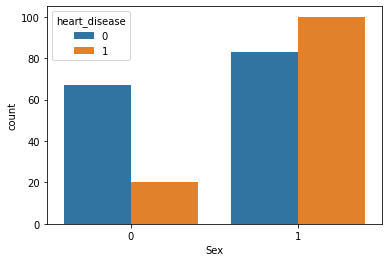

In [16]:
sns.countplot(data = df, x="Sex", hue="heart_disease")

In [17]:
df['Sex'].value_counts()

1    183
0     87
Name: Sex, dtype: int64

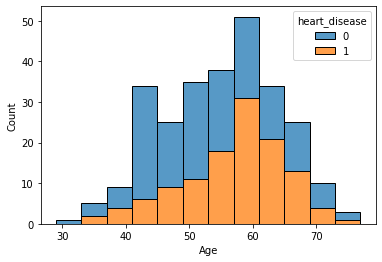

In [18]:
sns.histplot(data=df, x="Age", hue="heart_disease", multiple="stack")

In [19]:
df['Sex'].value_counts()

1    183
0     87
Name: Sex, dtype: int64

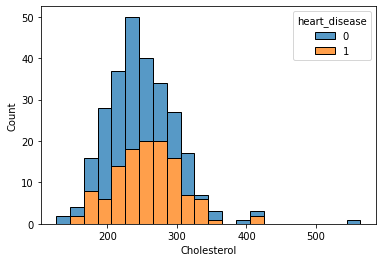

In [20]:
sns.histplot(data=df, x="Cholesterol", hue="heart_disease", multiple="stack")

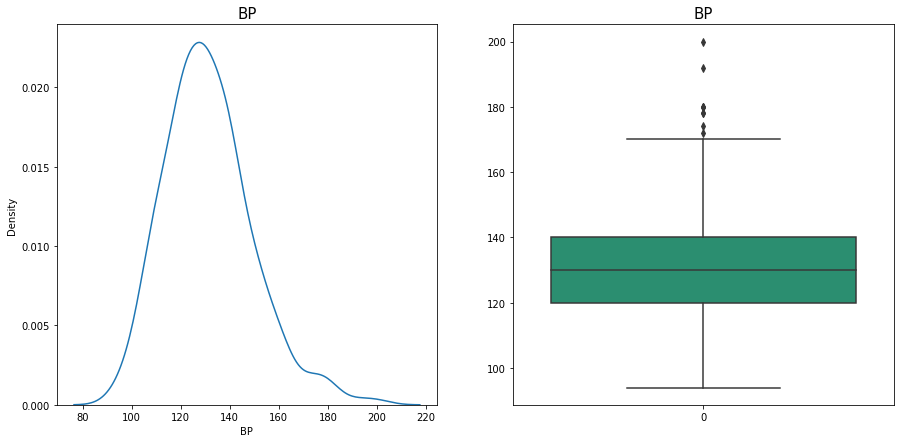

In [21]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("BP", fontsize=15)
sns.kdeplot(data = df["BP"])
plt.subplot(1,2,2)
plt.title("BP", fontsize=15)
sns.boxplot(data = df["BP"], palette="Dark2")
plt.show()

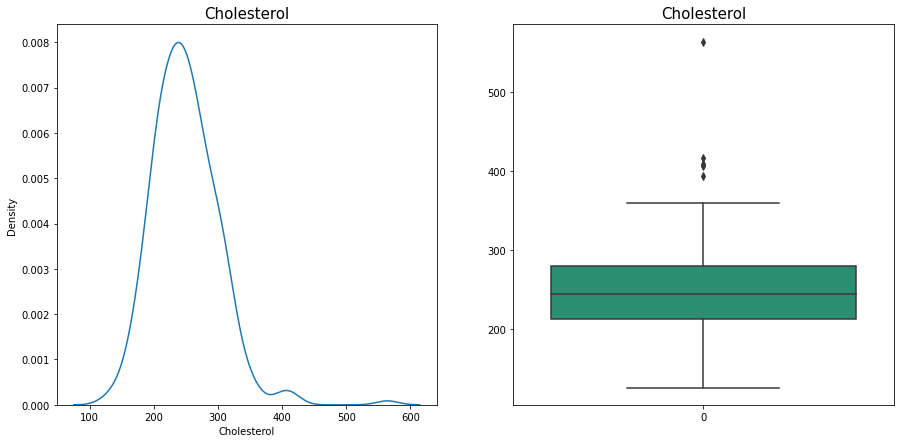

In [22]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("Cholesterol", fontsize=15)
sns.kdeplot(data = df["Cholesterol"])
plt.subplot(1,2,2)
plt.title("Cholesterol", fontsize=15)
sns.boxplot(data = df["Cholesterol"], palette="Dark2")
plt.show()


In [23]:
q1 = df["Cholesterol"].quantile(0.25)
q2 = df["Cholesterol"].quantile(0.75)
IQR = q2 - q1
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR) 
df1 = pd.DataFrame(np.where(df["Cholesterol"] > max_limit, max_limit, 
         (np.where(df["Cholesterol"] < min_limit, min_limit, df["Cholesterol"]))), columns=["Cholesterol"])

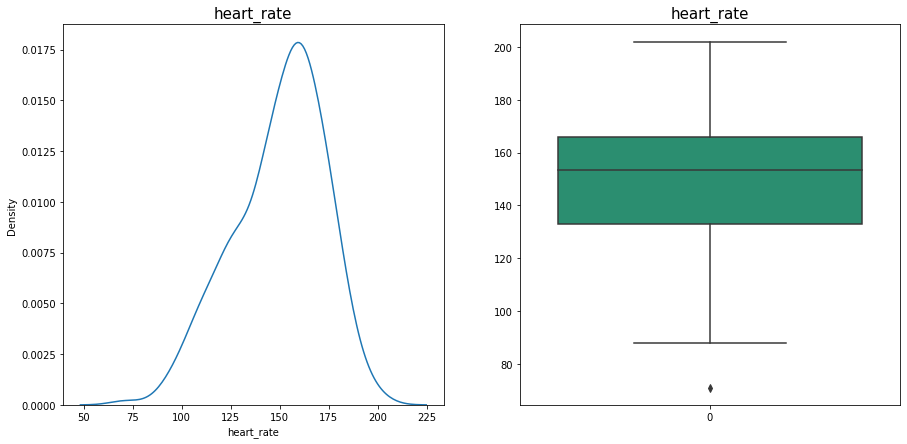

In [24]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("heart_rate", fontsize=15)
sns.kdeplot(data = df["heart_rate"])
plt.subplot(1,2,2)
plt.title("heart_rate", fontsize=15)
sns.boxplot(data = df["heart_rate"], palette="Dark2")
plt.show()


In [25]:
q1 = df["heart_rate"].quantile(0.25)
q2 = df["heart_rate"].quantile(0.75)
IQR = q2 - q1
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR) 
df1 = pd.DataFrame(np.where(df["heart_rate"] > max_limit, max_limit, 
         (np.where(df["heart_rate"] < min_limit, min_limit, df["heart_rate"]))), columns=["heart_rate"])

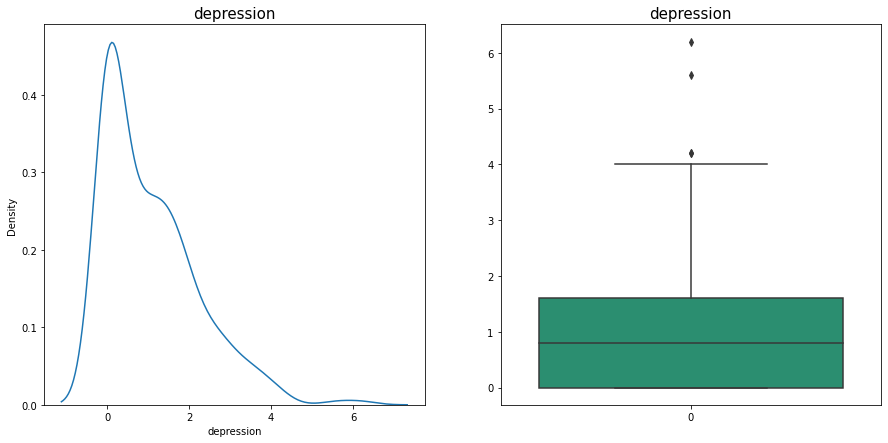

In [26]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("depression", fontsize=15)
sns.kdeplot(data = df["depression"])
plt.subplot(1,2,2)
plt.title("depression", fontsize=15)
sns.boxplot(data = df["depression"], palette="Dark2")
plt.show()


In [27]:
q1 = df["depression"].quantile(0.25)
q2 = df["depression"].quantile(0.75)
IQR = q2 - q1
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR) 
df1 = pd.DataFrame(np.where(df["depression"] > max_limit, max_limit, 
         (np.where(df["depression"] < min_limit, min_limit, df["depression"]))), columns=["depression"])

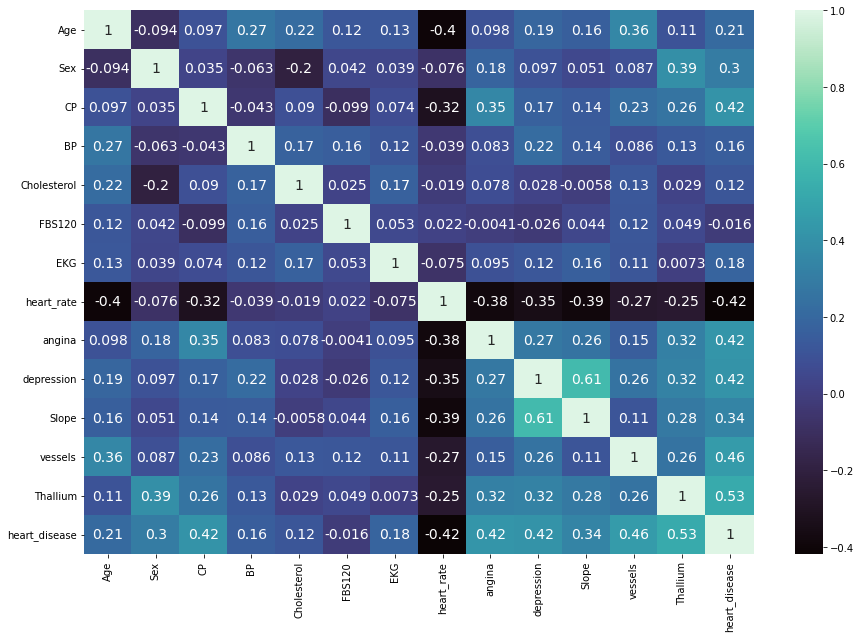

In [28]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap="mako", annot_kws={"size":14})

In [29]:
x = df.drop('heart_disease', axis=1)
y = df['heart_disease']


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=0)

In [31]:
# DecisionTree

In [32]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state = 0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [33]:
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 75.93 %


In [34]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [35]:
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.7450980392156864
Precision Score :  0.7037037037037037
Recall Score :  0.7916666666666666


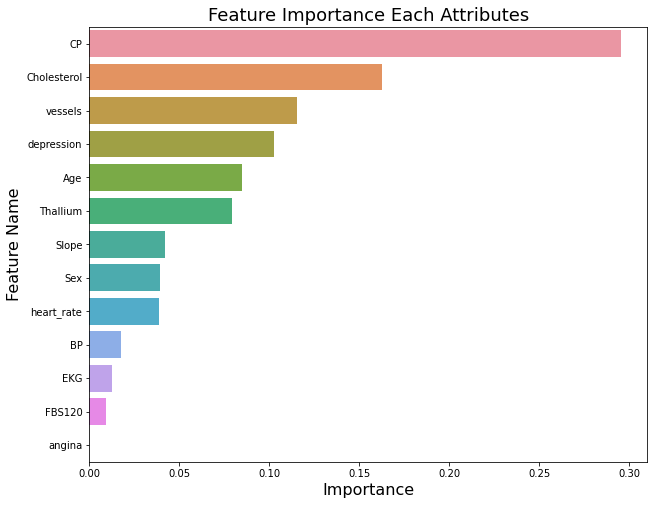

In [36]:
# Feature Importance
imp_df = pd.DataFrame({
"Feature Name": X_train.columns,
"Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=fi, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [37]:
# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
RandomForest_model=RandomForestClassifier(random_state=1,n_estimators=300,class_weight='balanced',criterion='gini',
                    min_samples_leaf=5,
                       min_samples_split=10)
RandomForest_model.fit(X_train,y_train)
Ran_accuracy=RandomForest_model.score(X_test,y_test)
accuracy1 =RandomForest_model.score(X_train,y_train) 
print(Ran_accuracy,accuracy1)

0.7222222222222222 0.9166666666666666


In [39]:
Ran_Model = RandomForest_model.fit(X_train, y_train)
Ran_prd = RandomForest_model.predict(X_test)
pd.crosstab(y_test, Ran_prd, rownames = ['Actual'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,22,8,30
1,7,17,24
All,29,25,54


In [44]:
print(classification_report(y_test, Ran_prd))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75        30
           1       0.68      0.71      0.69        24

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.72      0.72      0.72        54



In [41]:
actual1 = np.repeat([1,0], repeats=[5420, 4580])
pred1 = np.repeat([1, 0, 1, 0], repeats=[3252, 2046,2843, 1859])

RAN_F1= f1_score(actual1,pred1)
RAN_F1

0.5860182370820669

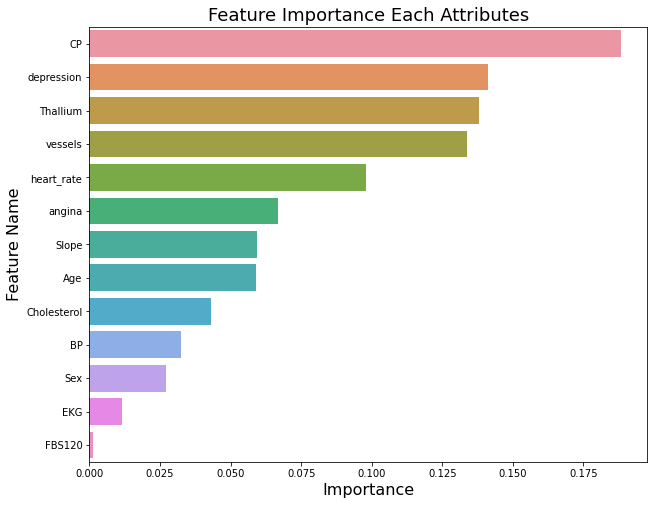

In [43]:
# Feature Importance
imp_df = pd.DataFrame({
"Feature Name": X_train.columns,
"Importance": Ran_Model.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=fi, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()


In [ ]:
# AdaBoost

In [45]:
from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier()
Ada_Model = Ada.fit(X_train, y_train)
Ada_Pred = Ada_Model.predict(X_test) 
Ada_Pred

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1])

In [46]:
pd.crosstab(y_test, Ada_Pred, rownames = ['Actual'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,24,6,30
1,8,16,24
All,32,22,54


In [48]:
print(classification_report(y_test, Ada_Pred))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77        30
           1       0.73      0.67      0.70        24

    accuracy                           0.74        54
   macro avg       0.74      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54



In [49]:
Ada_accuracy = accuracy_score(y_test, Ada_Pred)
Ada_accuracy

0.7407407407407407

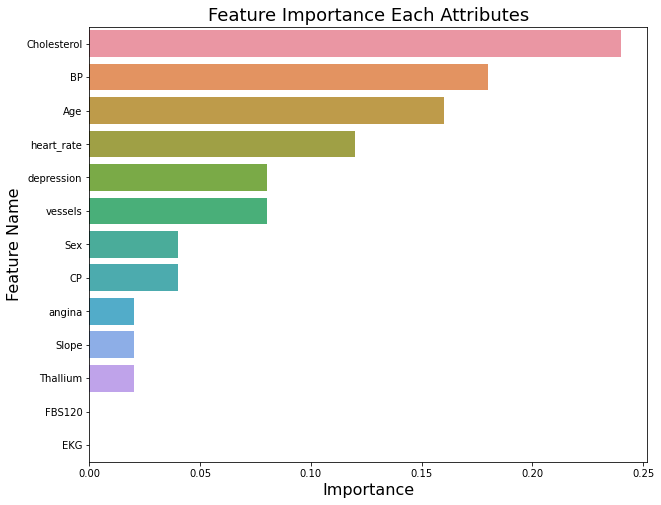

In [51]:
# Feature Importance
imp_df = pd.DataFrame({
"Feature Name": X_train.columns,
"Importance": Ada_Model.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=fi, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()